In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "AR PL UMing CN"
mpl.rcParams["axes.unicode_minus"] = False

players = pd.read_csv("D:/jupyter/FullData.csv")

pd.options.display.max_columns = 100
players.head()

False

In [9]:
# 3.1地区对球员的影响
players["Height"] = players["Height"].map(lambda x: int(x.replace("cm","")))
players["Weight"] = players["Weight"].map(lambda x: int(x.replace("kg","")))
players.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185,80,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170,72,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174,68,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182,85,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193,92,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [24]:
# 3.1从地区角度分析球员的技术能力分析:先根据Club分组，再获取Rating，然后对分组的内容进行计算
s1=players.groupby("Nationality")["Rating"].agg(["count","sum","mean"])

# 对结果s进行过滤，只需要前10的内容
s1=s1[s1["count"]>10]

# 根据平均评分降序排序,显示前十位的结果
s1.sort_values("mean",ascending=False).head(10)


,count,sum,mean
Nationality,,,
Algeria,50,3581,71.620000
Czech Republic,57,4047,71.000000
Ecuador,34,2406,70.764706
Gabon,15,1058,70.533333
Portugal,360,25329,70.358333
Morocco,74,5203,70.310811
Paraguay,75,5273,70.306667
Spain,1008,70859,70.296627
Brazil,921,64492,70.023887


<AxesSubplot:>

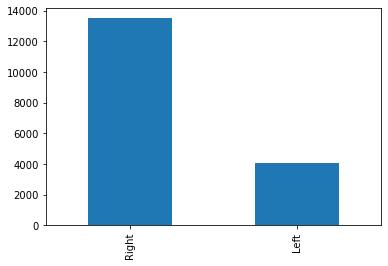

In [18]:
# 3.2 players["Preffered_Foot"].value_counts()
# 球员惯用脚情况分析
players["Preffered_Foot"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Density'>

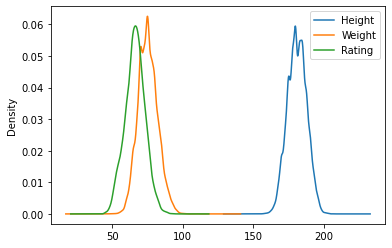

In [16]:
# 3.3身高体重与评分的关系
players[["Height","Weight","Rating"]].plot(kind="kde")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

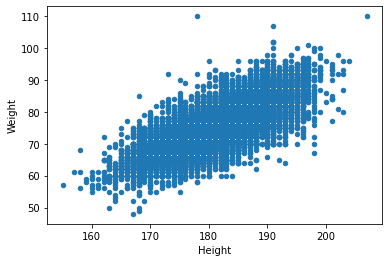

In [36]:
#3.3补充 身高体重的关联性
players.plot.scatter(x="Height",y="Weight")

<AxesSubplot:>

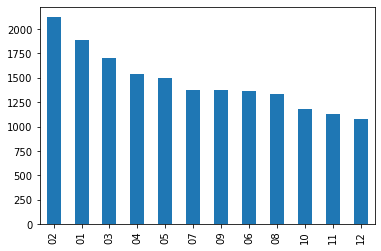

In [26]:
# 3.4全体运动员的年龄与评分的关系（黄金年龄）
y=players["Birth_Date"].str.split("/",expand=True)
y[0].value_counts().plot(kind="bar")

In [6]:
t = players["Birth_Date"].str.split(".", expand=True)
# t[0].value_counts().plot(kind="bar")
# t[1].value_counts().plot(kind="bar")
t[2].value_counts().sort_index().plot(kind="bar")

NameError: name 'players' is not defined